# Lab 2 - Exploring and manipulating data. 
Here is what we do in python 
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

In [1]:
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Define project directory
project_dir = r"C:\Users\balla\Projects\applied-ml-jballard"
data_file = os.path.join(project_dir, "data", "pollution_2000_2023.csv")

# Load dataset
df = pd.read_csv(data_file)

### Dataframe setup andf cleaning

In [3]:
# Define file path (ensure the correct location)
data_file = r"C:\Users\balla\Projects\applied-ml-jballard\data\pollution_2000_2023.csv"

# Load dataset
df = pd.read_csv(data_file)

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Filter for North Carolina
df = df[df["State"] == "North Carolina"]

# Consolidate AQI columns
aqi_columns = ["O3 AQI", "CO AQI", "SO2 AQI", "NO2 AQI"]
df["Consolidated_AQI"] = df[aqi_columns].mean(axis=1, skipna=True)

# Check missing values in target variable
missing_y = df["Consolidated_AQI"].isnull().sum()

# Handle missing values
if missing_y > 0:
    median_y = df["Consolidated_AQI"].median()
    df["Consolidated_AQI"].fillna(median_y, inplace=True)
    print(f" Filled {missing_y} missing values in 'Consolidated_AQI' with median: {median_y}")

# Check missing values in independent variable (x) - Date
missing_x = df["Date"].isnull().sum()

if missing_x > 0:
    df.dropna(subset=["Date"], inplace=True)  # Remove rows with missing Date
    print(f" Dropped {missing_x} rows with missing 'Date' values.")

# Convert Date to numerical format (ordinal)
df["Date_Ordinal"] = df["Date"].map(lambda x: x.toordinal())

# Define features (X) and target (y)
X = df[["Date_Ordinal"]]
y = df["Consolidated_AQI"]

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define save paths
output_dir = r"C:\Users\balla\Projects\applied-ml-jballard\outputs"
os.makedirs(output_dir, exist_ok=True)

train_path = os.path.join(output_dir, "train_set.csv")
test_path = os.path.join(output_dir, "test_set.csv")

# Combine X and y for saving
train_data = X_train.copy()
train_data["Consolidated_AQI"] = y_train

test_data = X_test.copy()
test_data["Consolidated_AQI"] = y_test

# Save datasets
train_data.to_csv(train_path, index=False)
test_data.to_csv(test_path, index=False)

print(f"Train set saved: {train_path}")
print(f"Test set saved: {test_path}")


Train set saved: C:\Users\balla\Projects\applied-ml-jballard\outputs\train_set.csv
Test set saved: C:\Users\balla\Projects\applied-ml-jballard\outputs\test_set.csv


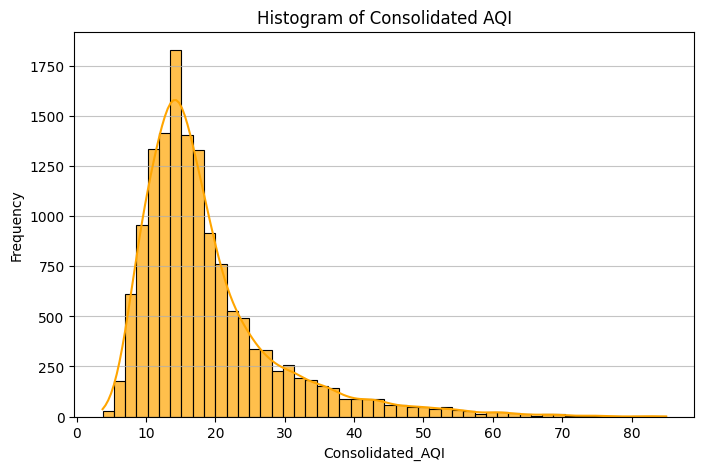

In [4]:
# Characterize consolidated AQI with histogram
# Target "y" variable
plt.figure(figsize=(8, 5))
sns.histplot(df["Consolidated_AQI"], bins=50, kde=True, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Consolidated_AQI")
plt.ylabel("Frequency")
plt.title("Histogram of Consolidated AQI")
plt.grid(axis="y", alpha=0.75)

# Ensure output directory exists
output_dir = os.path.join(project_dir, "outputs")
os.makedirs(output_dir, exist_ok=True)

# Save histogram
histogram_y_path = os.path.join(output_dir, "consolidated_aqi_histogram.png")
plt.savefig(histogram_y_path)
plt.show()



### Identify the independent variable = Date

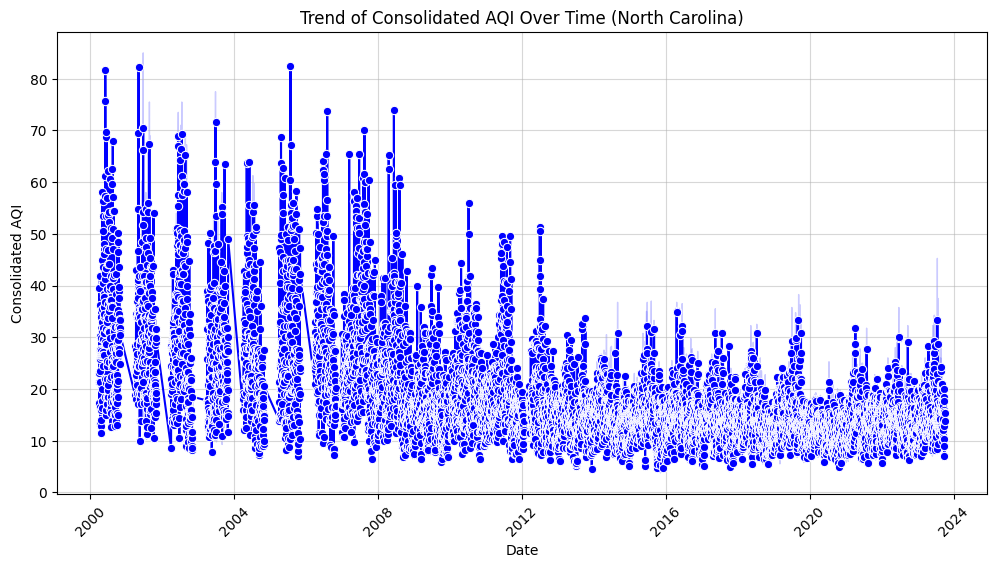

Target Variable (y): Consolidated AQI (Average of O3, CO, SO2, NO2 AQI)
Missing y Values: 0
Histogram saved at: C:\Users\balla\Projects\applied-ml-jballard\outputs\consolidated_aqi_histogram.png
Time-Series Plot saved at: C:\Users\balla\Projects\applied-ml-jballard\outputs\consolidated_aqi_time_series.png


In [5]:
# Independent Variable (x) Visualization: Date vs. AQI
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Consolidated_AQI", marker="o", color="blue")
plt.xlabel("Date")
plt.ylabel("Consolidated AQI")
plt.title("Trend of Consolidated AQI Over Time (North Carolina)")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)

# Save time-series plot
time_series_path = os.path.join(output_dir, "consolidated_aqi_time_series.png")
plt.savefig(time_series_path)
plt.show()

# Output results
print("Target Variable (y): Consolidated AQI (Average of O3, CO, SO2, NO2 AQI)")
print(f"Missing y Values: {missing_y}")
print(f"Histogram saved at: {histogram_y_path}")
print(f"Time-Series Plot saved at: {time_series_path}")

### Data Transformation
Explore rolling averages for consolidated AQI for North Carolina

#### Why might this transformation be helpful?

1. Air quality varies daily due to weather, traffic, and emissions, causing short-term fluctuations.

2. A rolling average smooths out short-term variations and highlights overall trends.

3. Helps detect seasonal or long-term pollution patterns in North Carolina

4. Useful for forecasting models to reduce noise and improve prediction accuracy.

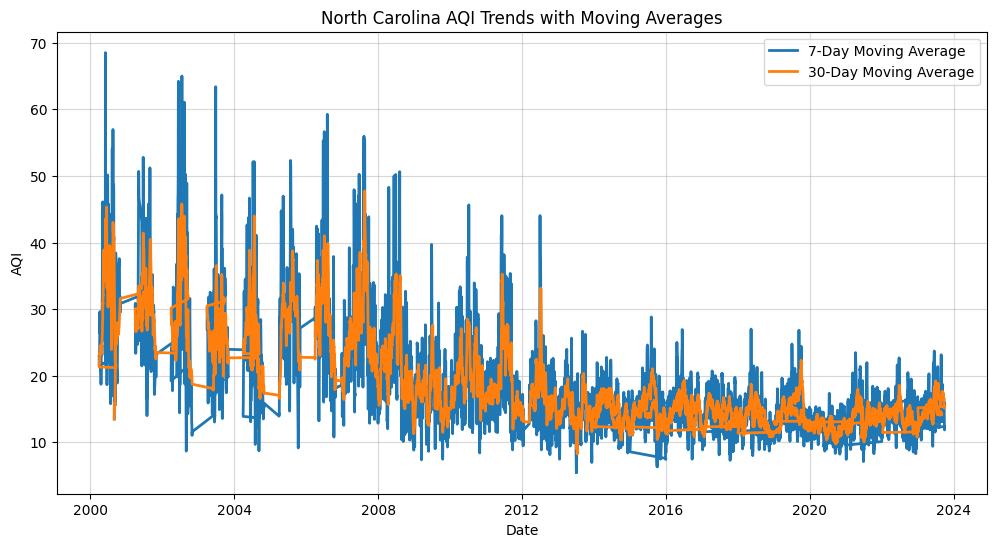

In [6]:
#Compute a 7-day rolling average for Consolidated_AQI:
df["AQI_7Day_MA"] = df["Consolidated_AQI"].rolling(window=7, min_periods=1).mean()

#Compute a 30-day rolling average for Consolidated_AQI:
df["AQI_30Day_MA"] = df["Consolidated_AQI"].rolling(window=30, min_periods=1).mean()

# Plot 7-day and 30-day moving averages
plt.figure(figsize=(12, 6))
# plt.plot(df["Date"], df["Consolidated_AQI"], label="Daily AQI", alpha=0.5)
plt.plot(df["Date"], df["AQI_7Day_MA"], label="7-Day Moving Average", linewidth=2)
plt.plot(df["Date"], df["AQI_30Day_MA"], label="30-Day Moving Average", linewidth=2)
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("North Carolina AQI Trends with Moving Averages")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

### Train the Linear Regression Model

In [7]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on test data
y_pred = model.predict(X_test)

In [9]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 6.13
R² Score: 0.3010


### Convert Ordinal dates back to date time for the graphics

In [12]:
# Convert ordinal values back to datetime
X_test_dates = X_test.copy()
X_test_dates["Date"] = X_test_dates["Date_Ordinal"].apply(lambda x: pd.Timestamp.fromordinal(int(x)))


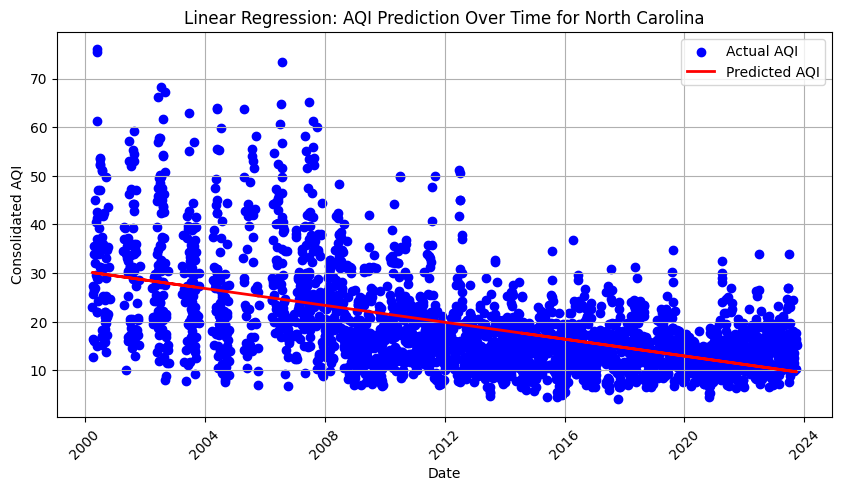

Plot saved to: C:\Users\balla\Projects\applied-ml-jballard\outputs\aqi_prediction.png


In [13]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.scatter(X_test_dates["Date"], y_test, color="blue", label="Actual AQI")
plt.plot(X_test_dates["Date"], y_pred, color="red", linewidth=2, label="Predicted AQI")

# Format labels
plt.xlabel("Date")
plt.ylabel("Consolidated AQI")
plt.title("Linear Regression: AQI Prediction Over Time for North Carolina")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Save the figure
output_dir = r"C:\Users\balla\Projects\applied-ml-jballard\outputs"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists
output_path = os.path.join(output_dir, "aqi_prediction.png")
plt.savefig(output_path, dpi=300)  # Save with high resolution

# Show the plot
plt.show()

print(f"Plot saved to: {output_path}")

